# [<center>K Nearest Neighberhood </center>]()


[<img style='width:50%' src='http://yazilimagiris.com/wp-content/uploads/2017/11/k_NN.png'>]()

## Table of Content

1. [Introduction](#Introduction)
2. [What is KNN?](#W)
3. [How does KNN work?](#H)
4. [More on K](#M)
5. [Exploring Our Data](#E)
6. [Parameter Tuning with Cross Validation](#P)
7. [Writing our Own KNN from Scratch](#Wr)
8. [Improvements](#I)

<a id="#intro">

# Introduction

This tutorial is designed to introduce you to a simple, yet powerful classification algorithm called K-Nearest-Neighbors. We will go over the intuition and mathematical detail of the algorithm, apply it to a real-world dataset to see exactly how it works, and gain an intrinsic understanding of its inner-workings by writing it from scratch in code. Finally, we will explore ways in which we can improve the algorithm.


Just for reference, this is “where” KNN is positioned in the algorithm list of scikit learn.

[<img style='20%' src='http://scikit-learn.org/stable/_static/ml_map.png'>]('img'/http://scikit-learn.org/stable/_static/ml_map.png)

Reference: http://scikit-learn.org/stable/tutorial/machine_learning_map/

<a id='W'></a>

 <a id="#what"></a>

## What is KNN ?


KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labeled dataset consisting of training observations $(x,y)$ and would like to capture the relationship between $x$ and $y$. More formally, our goal is to learn a function h:X→Y so that given an unseen observation $x$, h($x$) can confidently predict the corresponding output $y$.

The KNN classifier is also a ** nonparametric** and **instance-based learning** algorithm.

- **Non-parametric** means it makes no explicit assumptions about the functional form of h, avoiding the dangers of mismodeling the underlying distribution of the data. For example, suppose our data is highly non-Gaussian but the learning model we choose assumes a Gaussian form. In that case, our algorithm would make extremely poor predictions.
- **Instance-based learning** means that our algorithm doesn’t explicitly learn a model. Instead, it chooses to memorize the training instances which are subsequently used as “knowledge” for the prediction phase. Concretely, this means that only when a query to our database is made (i.e. when we ask it to predict a label given an input), will the algorithm use the training instances to spit out an answer.

It is worth noting that the **minimal training phase of KNN comes both at a memory cost**, since we must store a potentially huge dataset, as well as a computational cost during test time since classifying a given observation requires a rundown of the whole dataset. Practically speaking, this is undesirable since we usually want fast responses.

<a id='H'></a>

## How KNN works


In the classification setting, the K-nearest neighbor algorithm essentially bubbles down to forming a majority vote between the K most similar instances to a given “unseen” observation. A similarity is defined according to a distance metric between two data points. A common choice is the **Euclidean distance** given by:

$$ d(x,x′)=\sqrt{(x_1−x′_1)^2+(x_2−x′_2)^2+…+(x_n−x′_n)^2} $$
The Manhattan, Chebyshev and Hamming distance can be more suitable for a given setting.

More formally, given a positive integer K, an unseen observation $x$ and a similarity metric $d$, KNN classifier performs the following two steps:

1) It runs through the whole dataset computing d between x and each training observation. We’ll call the K points in the training data that are closest to x the set $A$. Note that K is usually odd to prevent tie situations.

2) It then estimates the conditional probability for each class, the fraction of points in $A$ with that given class label. (Note $I(x)$ is the indicator function which evaluates to 1 when the argument $x$ is true and 0 otherwise)

$$ P(y=j | X=x)=\frac{1}{K}\sum_{i∈A} I(y^i=j) $$

Finally, our input $x$ gets assigned to the class with the largest probability.


An alternate way of understanding KNN is by thinking about it as calculating a decision boundary which is then used to classify new points.

<a id='M'></a>

## More on K


At this point, you’re probably wondering how to pick the variable K and what its effects are on your classifier. Well, like most machine learning algorithms, the K in KNN is a hyperparameter that you, as a designer, must pick in order to get the best possible fit for the dataset. Intuitively, you can think of K as controlling the shape of the decision boundary we talked about earlier.

When K is small, we are restraining the region of a given prediction and forcing our classifier to be “more blind” to the overall distribution. A small value for K provides the most flexible fit, which will have low bias but high variance. Graphically, our decision boundary will be more jagged.

On the other hand, a higher K averages more voters in each prediction and hence is more resilient to outliers. Larger values of K will have smoother decision boundaries which mean lower variance but increased bias.

[<img src='http://bdewilde.github.io/assets/images/2012-10-26-knn-example-ks.png'>]('img/http://bdewilde.github.io/assets/images/2012-10-26-knn-example-ks.png')

<a id='E'></a>

## Exploring Our Data


Let’s see how KNN can be leveraged in Python for a classification problem. We are going to head over two different datasets from two different sources.

**Our Data**

- UNHR: http://www.ohchr.org/EN/HRBodies/HRC/Pages/Home.aspx
- The World Happiness Report: http://worldhappiness.report/

##### Does Happiness have an impact on someone's decision to leave his/her country?

The first dataset if from the UNHR, a database composed of asylum-seekers and refugees patterns. The data is classified according to several parameters. For the purpose of this tutorial, we will be working only on the **Total Number of Refugees** for more than a 100 countries from 2006 until 2015.

The second dataset if The World Happiness Report: a landmark survey of the state of global happiness. The World Happiness Report ranks 156 countries by their happiness levels.

We have joined the World Happiness Report dataset with the total number of refugees result calculated from the asylum-seeker database outside this tutorial. The data is ready to be classified.

###### The Reason
The reason of choosing this dataset is because predicting the number of refugees is pretty difficult, worst if we are trying to predict an exact number. KNN is efficient with labled data. Therefore, we have turned the number of refugees into intervals to make sure that we get an accurate output. You may tell em that SVM may seem better on this kind of data. However, writting SVM from scratch would take a heavy computational ressources and time. 
 
***Because KNN prefers $y$ to be labeled, we had done so by labeling and classifying the number of refugees by Very Low, Low, Upper Low, Lower Middle and so. For example, a very Low label means that the number of refugees in a specific year is less than 500 refugees.***

The first thing we need to do is load our dataset. It is in xlsx format so we’ll use pandas’ read_excel function.

In [1]:
#Loading library
import pandas as pd

In [2]:
# Calling the training data
data = pd.read_excel('data.xlsx')
#Squeeze the number a little bit
data = data.round(2)
#Display the first 4 row of our dataset
data.head()

,Country,Year,Total Refugees,Refugees Number Classification level,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Switzerland,2006,4,Very Low,7.47,10.87,0.95,71.67,0.92,0.28,0.41,0.82,0.21,0.63
1,Finland,2006,5,Very Low,7.67,10.60,0.96,69.44,0.97,-0.02,0.13,0.72,0.17,0.76
2,Cyprus,2006,8,Very Low,6.24,10.45,0.88,71.04,0.84,0.01,0.71,0.83,0.25,0.66
3,Norway,2006,9,Very Low,7.42,11.08,0.96,69.57,0.96,0.08,0.40,0.83,0.20,0.68
4,Ireland,2006,12,Very Low,7.14,10.79,0.97,69.46,0.94,0.23,0.47,0.88,0.21,0.63


#### Data Visualization

After we uploaded our data and rounded the numbers to the nearest tenth decimal, let's normalize and plot.

In [3]:
df = data.drop(['Country','Year','Total Refugees','Refugees Number Classification level'],axis=1)
df_norm =(df - df.mean()) / (df.max() - df.min())
df_norm.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,0.386015,0.332656,0.195477,0.251122,0.295724,0.322494,-0.376807,0.182365,-0.095979,0.181630
1,0.423966,0.279714,0.209762,0.195190,0.369253,-0.026343,-0.674679,0.009951,-0.181086,0.326074
2,0.152618,0.250303,0.095477,0.235320,0.178077,0.008540,-0.057658,0.199606,-0.010873,0.214963
3,0.376527,0.373832,0.209762,0.198451,0.354547,0.089936,-0.387445,0.199606,-0.117256,0.237185
4,0.323396,0.316969,0.224048,0.195692,0.325136,0.264354,-0.312977,0.285813,-0.095979,0.181630


In [4]:
#Plot the data to have an overall idea about what is going on
#import matplotlib library
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 10))
#Our X axi
total_refugees = data['Total Refugees']
#Life ladder
plt.plot(total_refugees,df_norm['Life Ladder'],'+',color='blue')
#Social support
plt.plot(total_refugees,df_norm['Social support'],'+',color='orange')
#Generosity
plt.plot(total_refugees,df_norm['Generosity'],'+',color='green')
#Log GDP per capita
plt.plot(total_refugees,df_norm['Log GDP per capita'],'+',color='red')
#Healthy lige expectancy at birth
plt.plot(total_refugees,df_norm['Healthy life expectancy at birth'],'+',color='purple')
#Freedom to make life choices
plt.plot(total_refugees,df_norm['Freedom to make life choices'],'+',color='brown')
#Preception of corruptipn
plt.plot(total_refugees,df_norm['Perceptions of corruption'],'+',color='black')
#Positive affect
plt.plot(total_refugees,df_norm['Positive affect'],'+',color='yellow')
#Negative affect
plt.plot(total_refugees,df_norm['Negative affect'],'+',color='Cyan')
#Confidence in national government
plt.plot(total_refugees,df_norm['Confidence in national government'],'+',color='indigo')
plt.show()


#You may need to re-run this cell if it did not display the graph.

Let take a look at which country has the highest number of refugees according to a specific year

In [5]:
#We are keeping the three following attributes
year_number = data[['Year','Total Refugees','Country']]

In [6]:
# We are going to group the dataframe by year and country first, then we will split the grouped dataframe by year.
grouped = year_number.groupby(['Year','Country']).sum().reset_index()
#Split the dataframe into multiple dataframes accodring to the year attributes
indices=[0]
list_by_year=[]
i=1
while i < len(grouped):
    if grouped['Year'].iloc[i] > grouped['Year'].iloc[i-1]:
        indices.append(i)
    i+=1
indices.append(i)
list_by_year = [grouped[a:b] for (a,b) in zip(indices[:-1], indices[1:])]

Now, let take the year 2006, 2007,2014 and 2015, and plot the number of refugees. Luckily, pandas can be very handy in term of visualization. We will be using the barh kind.

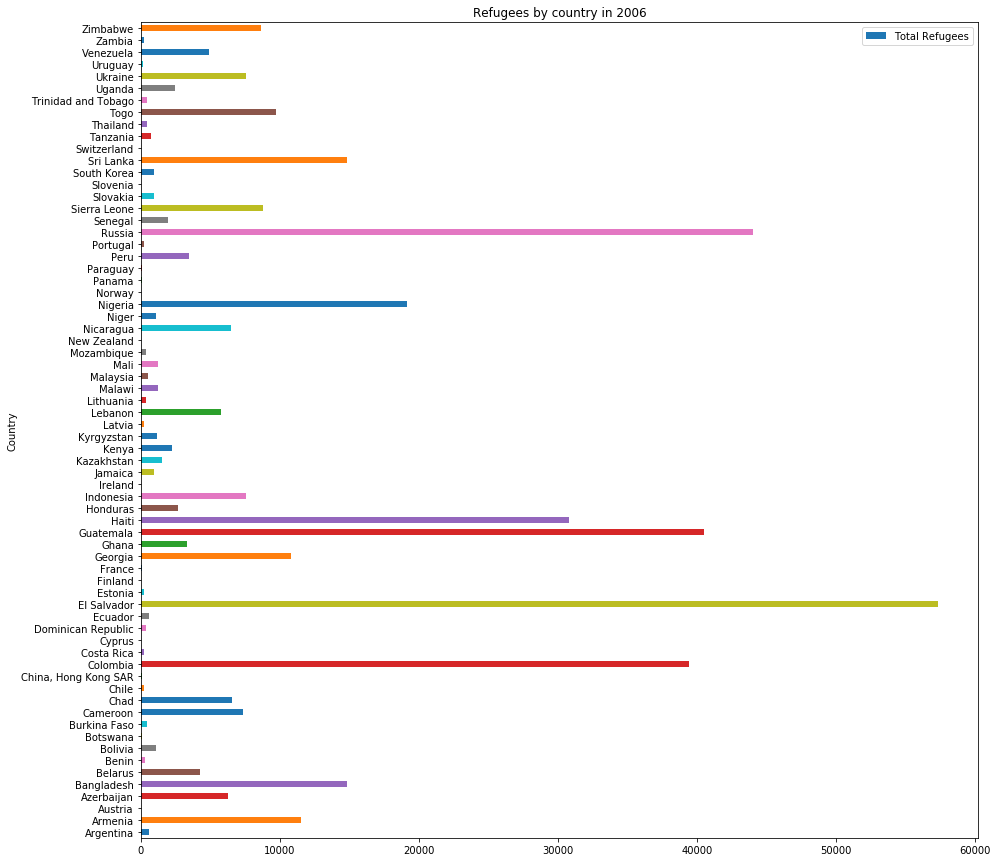

In [7]:
#Year 2006 is in position 0 in our list
Year_2006 = list_by_year[0]
plt.figure()
Year_2006.plot(x='Country',y='Total Refugees',kind='barh',figsize=(15,15),title='Refugees by country in 2006')

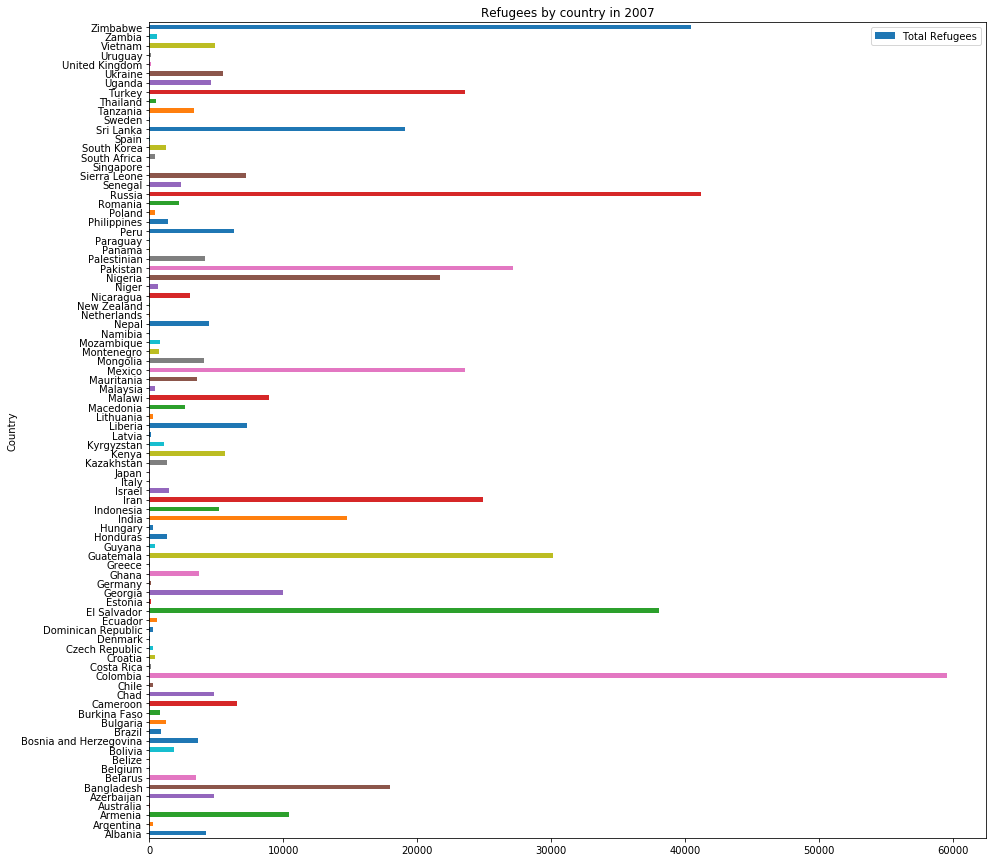

In [8]:
#Year 2007 is in position 1 in our list
Year_2007 = list_by_year[1]
plt.figure()
Year_2007.plot(x='Country',y='Total Refugees',kind='barh',figsize=(15,15),title='Refugees by country in 2007')

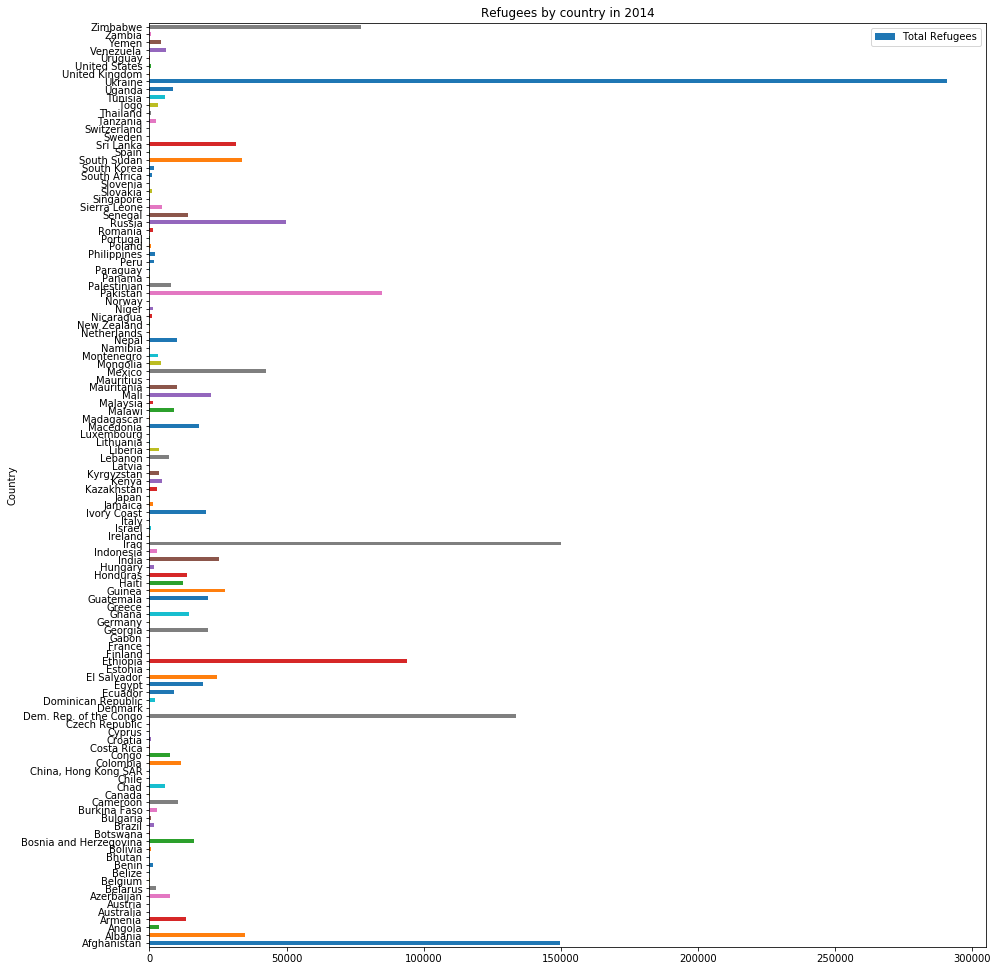

In [9]:
#Year 2014 is in position 8 in our list
Year_2014 = list_by_year[8]
plt.figure()
Year_2014.plot(x='Country',y='Total Refugees',kind='barh',figsize=(15,17),title='Refugees by country in 2014')

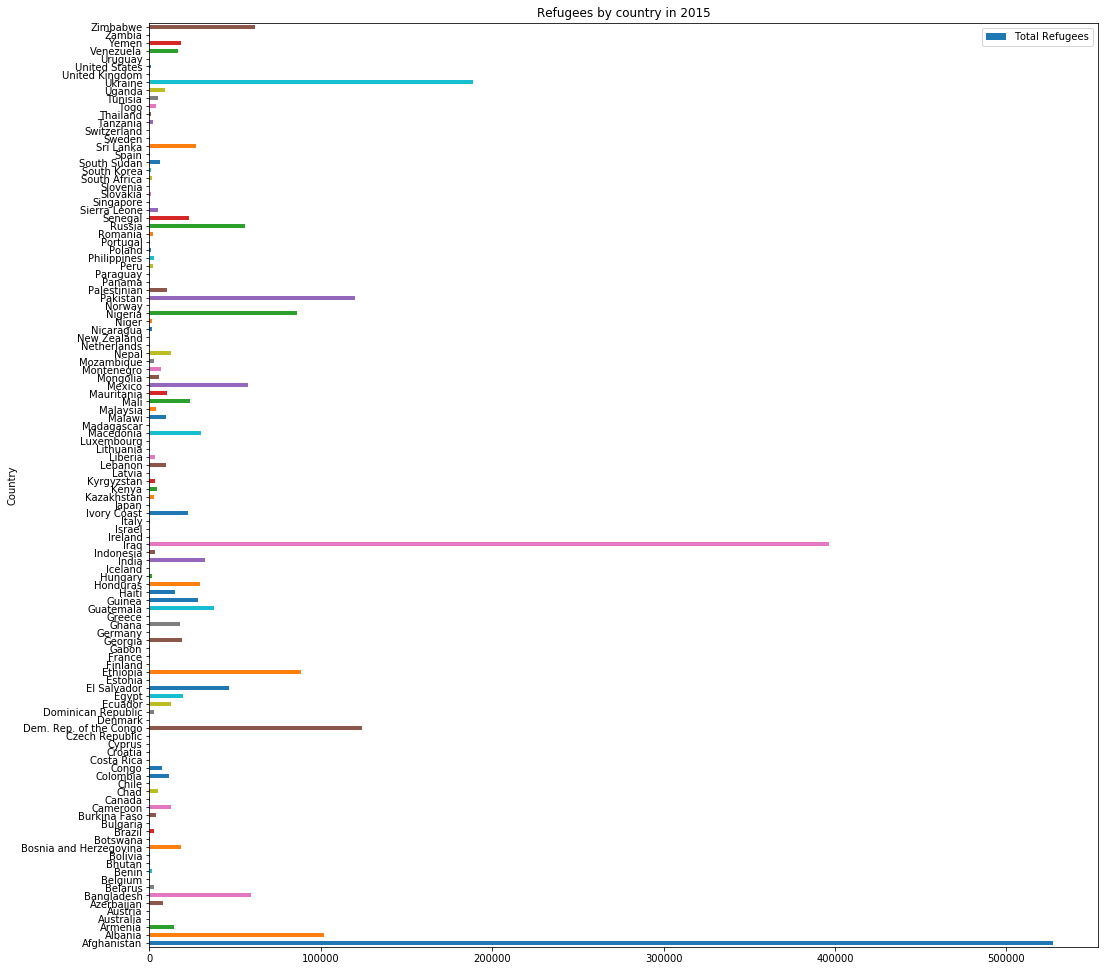

In [10]:
#Year 2015 is in position 9 in our list
year_2105 = list_by_year[9]
plt.figure()
year_2105.plot(x='Country',y='Total Refugees',kind='barh',figsize=(17,17),title='Refugees by country in 2015')

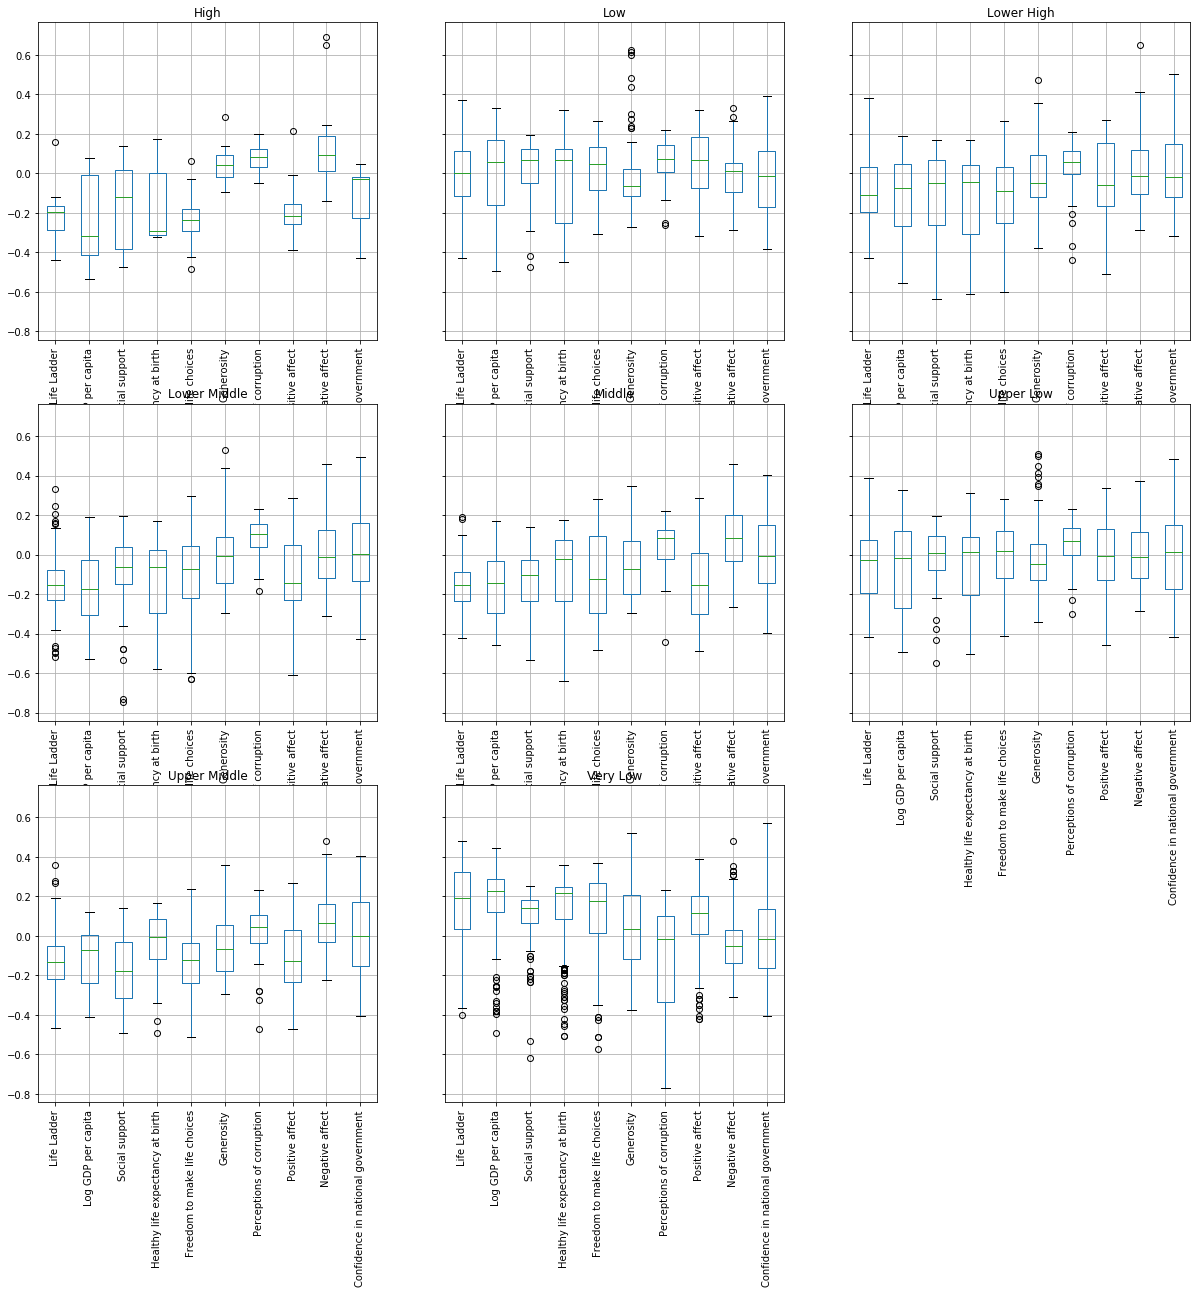

In [11]:
#The box plot helps to visualize the weight of each attribute on the X target. Notice here we have used the normalized 
#dataframe so we can have a more or less the same level of boxes. The Y axis values do not have any meaningful 
#intrepretation.
refugees_classes = data['Refugees Number Classification level']
plt.figure()
bp = df_norm.groupby(refugees_classes).boxplot(figsize=(20,20),rot=90)

Now, it’s time to be serious. We’ll be using **scikit-learn** to train a KNN classifier and evaluate its performance on the dataset using the 4 step modeling pattern:

1. Import the learning algorithm
2. Instantiate the model
3. Learn the model
4. Predict the response

In [12]:
#Spliting the data into training and test data.
# Loading sklearn libray
from sklearn import neighbors, model_selection,metrics,cross_validation
# create design matrix X and target vector y for the training and test data
x =  data.drop(['Country','Year','Refugees Number Classification level','Total Refugees'], axis=1).values
# Don't forget, we would like to predict the classification level of each country number of refugees
y = data['Refugees Number Classification level'].values
X_train,X_test,y_train,y_test= cross_validation.train_test_split(x,y,test_size=0.20,random_state=42)

C:\Users\medSr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
print('Size of our training data X: %d'%  len(X_train))
print('Size of our training data y: %d'% len(y_train))
print('Size of our test data X: %d'% len(X_test))
print('Size of our test data y: %d'% len(y_test))

Size of our training data X: 798
Size of our training data y: 798
Size of our test data X: 200
Size of our test data y: 200


Finally, following the above modeling pattern, we define our classifier, in this case, KNN fits it to our training data and evaluate its accuracy. We’ll be using an arbitrary K but we will see later on how cross-validation can be used to find its optimal value.

In [14]:
#scikit-learn requires that the design matrix $X$ and target vector $y$ be numpy arrays.

# instantiate learning model (k = 3). This an arrbitray choice, just to see how things are working
knn = neighbors.KNeighborsClassifier(n_neighbors=3)

#fitting the model
knn.fit(X_train, y_train)

#predict the response
predict = knn.predict(X_test)
#evaluate accurancy
accurancy = metrics.accuracy_score(y_test, predict)
print('Accurancy score is %d%%'% (accurancy*100))

Accurancy score is 60%


47% is pretty bad right ?! Because we are busy data scientists and because we don't have enough time to choose randomly k, so we will write a shortcode to do the tunning using Cross-Validation.

<a id='P'></a>

## Parameter Tuning with Cross Validation

In this section, we’ll explore a method that can be used to tune the hyperparameter K.

Certainly, the best K is the one that corresponds to the lowest test error rate. An alternative and smarter approach involves estimating the test error rate by holding out a subset of the training set from the fitting process. This subset, called the validation set, can be used to select the appropriate level of flexibility of our algorithm! There are different validation approaches that are used in practice, and we will be exploring one of the more popular ones called k-fold cross-validation.

[<img src='http://chrisjmccormick.files.wordpress.com/2013/07/10_fold_cv.png'>]('img'/'http://chrisjmccormick.files.wordpress.com/2013/07/10_fold_cv.png')

As seen in the image, k-fold cross validation (the k is totally unrelated to K) involves randomly dividing the training set into k groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining $k−1$ folds. The misclassification rate is then computed on the observations in the held-out fold. This procedure is repeated k times; each time, a different group of observations is treated as a validation set. This process results in k estimates of the test error which are then averaged out.

We’re gonna make it clearer by performing a 10-fold cross validation on our dataset using a generated list of odd K’s ranging from 1 to 55.

In [15]:
# creating odd list of K for KNN
#We chose the number 55 because the miscalification error will still go up no matter the number.
myList = list(range(1,55))

# subsetting just the odd ones
filter_ = filter(lambda x: x % 2 != 0, myList)
neighbor  = list(filter_)

# empty list that will hold cv scores
cv_score = []

# perform 10-fold cross validation
for k in neighbor :
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=10,scoring='accuracy')
    mean = scores.mean()
    cv_score.append(mean)

Again, scikit-learn comes in handy with its cross_val_score() method. We specify that we are performing 9 folds with the cv=9 parameter and that our scoring metric should be accuracy since we are in a classification setting.

Finally, we plot the misclassification error versus K.

In [16]:
# changing to misclassification error
MSE = [1 - x for x in cv_score]

In [17]:
# determining best k
optimal_k = neighbor[MSE.index(min(MSE))]

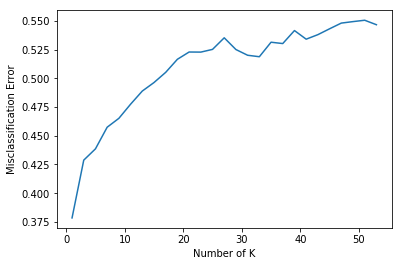

Optimal number of Neighbors K is 1


In [18]:
# plot misclassification error vs k
plt.plot(neighbor,MSE)
plt.xlabel('Number of K')
plt.ylabel('Misclassification Error')
plt.show()
print('Optimal number of Neighbors K is %d' % optimal_k)

<a id='Wr'></a>

## Writing our Own KNN from Scratch


It’s time to go deeper into KNN by trying to code it by ourselves from scratch.

A machine learning algorithm usually consists of 2 main blocks:

- a training block that takes as input the training data $X$ and the corresponding target $y$ and outputs a learned model $h$.

- a predicted block that takes as input new and unseen observations and uses the function $h$ to output their corresponding responses.

In the case of KNN, which as discussed earlier, the training block reduces to just memorizing the training data. Let’s go ahead a write a python method that does so.

In [19]:
def train(X_train, y_train):
    #do nothing
    return

Now we need to write the predict method which must do the following: it needs to compute the Euclidean distance between the “new” observation and all the data points in the training set. It must then select the K nearest ones and perform a majority vote. It then assigns the corresponding label to the observation. Let’s go ahead and write that.

In [20]:
#import numpy and counter
import numpy as np
from collections import Counter

In [21]:
def predict(X_train, y_train, x_test, k):
    #create list of distance and targets
    distances=[]
    targets=[]
    
    for i in range(len(X_train)):
        #first we compute the euclidean distance
        distance = np.sqrt(np.sum(np.square(x_test - X_train[i,:])))
        #add it to list of distances
        distances.append([distance,i])
        
    #sort the list
    distances = sorted(distances)
    
    #make a list of the k neighbors' targets
    for i in range(k):
        index=distances[i][1]
        targets.append(y_train[index])
        
    # return most common target     
    return Counter(targets).most_common(1)[0][0]

In the above code, we create an array of distances which we sort by increasing order. That way, we can grab the K nearest neighbors (first K distances), get their associated labels which we store in the targets array, and finally perform a majority vote using a Counter.

Putting it all together, we can define the function KNearestNeighbor, which loops over every test example and makes a prediction.

In [22]:
def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
    #train on the input data
    train(X_train,y_train)
    
    #loop over all observations
    for i in range(len(X_test)):
        p = predict(X_train,y_train,X_test[i,:],k)
        predictions.append(p)
    return predictions

Let’s go ahead and run our algorithm with the optimal K we found using cross-validation.

In [23]:
# Our predictions 
predictions =[]
# 1 is the optimal K found while running the Cross Validation
p = kNearestNeighbor(X_train, y_train, X_test, predictions, 1)

predictions = np.array(predictions)
score = metrics.accuracy_score(y_test, predictions)
print('The accurancy score of our classifier is %d%%' % (score*100))

The accurancy score of our classifier is 64%


We've just written our KNN algorithm from scratch, but our accurancy score still low. We will see bellow how to make KNN more effective to have a better accurancy score.

<a id='I'></a>

## Improvements


There are many ways in which the KNN algorithm can be improved.

- A simple and effective way to remedy skewed class distributions is by implementing weighed voting. The class of each of the K neighbors is multiplied by a weight proportional to the inverse of the distance from that point to the given test point. This ensures that nearer neighbors contribute more to the final vote than the more distant ones.

- Rescaling the data makes the distance metric more meaningful. An observation such as x=[180,70] will clearly skew the distance metric in favor of height. One way of fixing this is by column-wise subtracting the mean and dividing by the standard deviation. 

- Dimensionality reduction techniques like PCA should be executed prior to applying KNN and help make the distance metric more meaningful.

#### References

Stanfords CS231n notes on KNN. [<a href='http://cs231n.github.io/classification/#nn'>here</a>]('http://cs231n.github.io/classification/#nn)